# Applied Computational Economics and Finace 6.6

これまで学んできた補間を実装するために便利な関数を提供してくれている


## fundefn(bastype, n, a, b, order)

### 補間の形式、始点と終点などの情報を要約してくれる

* bastypeには補間の形式をいれる。チェビチェフのノードを使う多項式補間なら:cheb、スプラインなら:spil、線形スプラインなら:linとする
* nは多項式補間の場合は補間の点の数、スプライン補間なら基底の関数の数
* aは補間の始点
* bは補間の終点
* orderはスプライン補間のときのみのオプションで、スプライン関数の次元

In [1]:
using BasisMatrices

INFO: Recompiling stale cache file C:\Users\eiki\.julia\lib\v0.5\BasisMatrices.ji for module BasisMatrices.


[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7

In [3]:
using CompEcon

INFO: Recompiling stale cache file C:\Users\eiki\.julia\lib\v0.5\CompEcon.ji for module CompEcon.


[0x7FFFB13870E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)


In [4]:
fspace1 = fundefn(:cheb, 10, -1, 2)

Dict{Symbol,Any} with 6 entries:
  :params   => Any[Any[10,-1,2]]
  :a        => [-1.0]
  :b        => [2.0]
  :n        => [10]
  :d        => 1
  :basetype => Symbol[:cheb]

## funfitf(fspace, f, additional parameter)

### fspaceで与えられた補間の情報をもとに、関数fの補間の係数を求める

* fspaceは前述のfundefnの結果で、どういった補間をするかという情報
* fは補間したい関数
* additional parameterは関数fに入れる未知数

これだけだと、既知の関数を補間するのでそれほど役に立たない

## funfitxy(fspace, x, y)

### fspaceで与えられた補間の情報をもとに、x, yで示された点の補間の係数を求める

* fspaceは同様
* xは既知の説明変数の値の行列
* yは上のxに対応する実現値

## funeval(c, fspace, x)

### どのような補間か決まり、その補間の係数が求められたのちに、xでの当てはめ値を返す
* c上のfunfitf,funfitxyで求めた係数
* fspaceはこれまでと同様
* xに入れた点で補間の当てはめ値を返す


## funeval(c, fspace, x, order)

### orderに入れられた数字の回数だけ補間の関数を微分し、その当てはめ値を返す

In [5]:
f(x) = exp(-2x)

f (generic function with 1 method)

In [6]:
fspace = fundefn(:cheb, 10, -1, 1)

Dict{Symbol,Any} with 6 entries:
  :params   => Any[Any[10,-1,1]]
  :a        => [-1.0]
  :b        => [1.0]
  :n        => [10]
  :d        => 1
  :basetype => Symbol[:cheb]

In [8]:
c = funfitf(fspace, f)

10-element Array{Float64,1}:
  2.27959    
 -3.18127    
  1.3779     
 -0.42548    
  0.101457   
 -0.0196514  
  0.00320035 
 -0.000449278
  5.53942e-5 
 -6.03393e-6 

In [9]:
x = linspace(-1, 1, 1001)

1001-element LinSpace{Float64}:
 -1.0,-0.998,-0.996,-0.994,-0.992,-0.99,…,0.99,0.992,0.994,0.996,0.998,1.0

In [10]:
y = funeval(c, fspace, x)

([7.38906,7.35956,7.33018,7.30092,7.27177,7.24274,7.21383,7.18503,7.15635,7.12778  …  0.140296,0.139736,0.139178,0.138623,0.138069,0.137518,0.136969,0.136422,0.135877,0.135335],Dict{Symbol,Any}(Pair{Symbol,Any}(:format,:expanded),Pair{Symbol,Any}(:order,[0]),Pair{Symbol,Any}(:vals,Any[[1.0 -1.0 … 1.0 -1.0; 1.0 -0.998 … 0.874667 -0.842276; … ; 1.0 0.998 … 0.874667 0.842276; 1.0 1.0 … 1.0 1.0]])))

In [11]:
y[1]

1001-element Array{Float64,1}:
 7.38906 
 7.35956 
 7.33018 
 7.30092 
 7.27177 
 7.24274 
 7.21383 
 7.18503 
 7.15635 
 7.12778 
 7.09933 
 7.07099 
 7.04276 
 ⋮       
 0.141423
 0.140859
 0.140296
 0.139736
 0.139178
 0.138623
 0.138069
 0.137518
 0.136969
 0.136422
 0.135877
 0.135335

In [12]:
using Plots


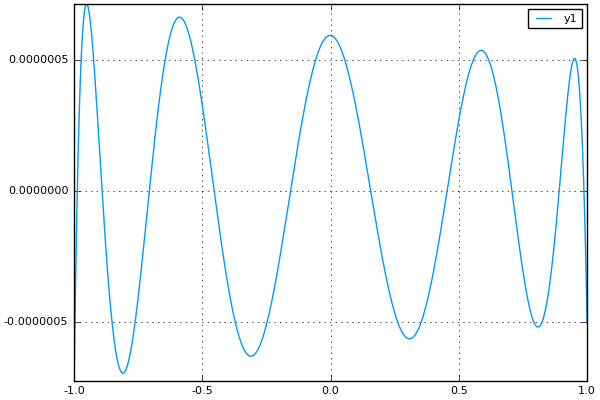

In [13]:
plot(x, y[1]-f(x))

## funbas(fspace, x)

### fspaceからわかる基底関数のxでの当てはめ値を返す

## funnode(fspace)

### fspaceで与えられて補間のノードを返す